In [72]:
from langchain_tavily import TavilySearch
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage
from langgraph.graph.message import add_messages    
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.types import interrupt,Command
import os       
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
class State_messages(TypedDict):
    messages:Annotated[list,add_messages]
    

In [79]:
groq_llm=init_chat_model("groq:llama3-8b-8192")
groq_llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023CF465DFD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023CF45D62D0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [117]:
tavily_srch=TavilySearch(max_results=2)

def multiply(x:int, y:int) -> int:
    """ mutiply two numbers

    Args:
        x (int): _description_
        y (int): _description_

    Returns:
        int: _description_
    """
    return x * y    

def human_assistance(query: str) -> str:
    """Escalate to a human when AI guidance is requested."""
    human_response = interrupt({"query": query})
    return human_response["data"]       

groq_tools_list = [tavily_srch, multiply,human_assistance]   
groq_llm_with_tools = groq_llm.bind_tools(groq_tools_list)


In [118]:
def invoke_groq(State_messages):
    response=groq_llm_with_tools.invoke(State_messages["messages"])
    return {"messages":[response]+State_messages["messages"]}


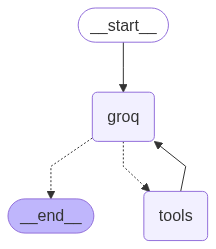

In [119]:
react_agent_graph = StateGraph(State_messages)

react_agent_graph.add_node("groq",invoke_groq)
react_agent_graph.add_node("tools", ToolNode(groq_tools_list,name="groq tools"))

react_agent_graph.add_edge(START, "groq")
react_agent_graph.add_conditional_edges("groq", tools_condition)   
react_agent_graph.add_edge("tools", "groq")
#react_agent_graph.add_edge("groq", END)

react_graph=react_agent_graph.compile()
react_graph

In [122]:
response = react_graph.invoke({
    "messages": ["I need help from a real AI expert. Can you ask someone to assist me?"
]
})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

I need help from a real AI expert. Can you ask someone to assist me?
================================== Ai Message ==================================

I'd be happy to help you with that. I'll reach out to a team of AI experts who can assist you with your question.

Can you please provide more context about what you're trying to achieve or what's not working as expected? The more information you provide, the better equipped our experts will be to assist you.

Also, please let me know if you have any specific requirements or preferences for the expert's response, such as the level of technical detail or the tone of the response.

Here's a tool call to initiate the expert assistance:

```json
{
  "tool_calls": [
    {
      "id": "pending",
      "type": "function",
      "function": {
        "name": "ask_expert",
        "parameters": {
          "query": "I need help from a real AI expert. Can you assist 

# Adding Memory

In [42]:
from langgraph.checkpoint.memory import MemorySaver

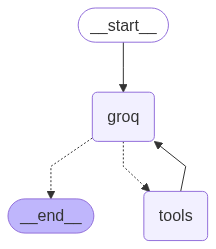

In [43]:
memory = MemorySaver()
memory_graph=react_agent_graph.compile(checkpointer=memory)
memory_graph

In [57]:
config = {
    "configurable":{
        "thread_id":"23"
    }
}

response = memory_graph.invoke(
    {
        "messages": [
            "my name is jashia"
        ]
    },
    config=config
)

In [55]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================== Ai Message ==================================

The weather today is mostly sunny with a high of 75°F (24°C) and a low of 55°F (13°C). As for your math question, 5 multiplied by 3 is 15, and divided by 10 is 1.5. And, of course, your name is Jashia!
================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================== Ai Message ==================================

/tool-use>
{
  "tool_calls": [
    {
      "id": "pending",
      "type": "function",
      "functio

In [58]:
config = {
    "configurable":{
        "thread_id":"23"
    }
}

response = memory_graph.invoke(
    {
        "messages": [
            "what is my name?"
        ]
    },
    config=config
)

In [59]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================== Ai Message ==================================

The weather today is mostly sunny with a high of 75°F (24°C) and a low of 55°F (13°C). As for your math question, 5 multiplied by 3 is 15, and divided by 10 is 1.5. And, of course, your name is Jashia!
================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================ Human Message =================================

What is the weather today and what is 5 multiplied by 3 and divided by 10 and my name is jashia
================================== Ai Message ==================================

/tool-use>
{
  "tool_calls": [
    {
      "id": "pending",
      "type": "function",
      "functio

In [61]:
config = {
    "configurable":{
        "thread_id":"12"
    }
}

response = memory_graph.invoke(
    {
        "messages": [
            "my name is jashia"
        ]
    },
    config=config
)

for m in response['messages']:
    m.pretty_print()    

================================ Human Message =================================

my name is jashia
================================== Ai Message ==================================

Nice to meet you, Jashia!
================================ Human Message =================================

my name is jashia
================================== Ai Message ==================================

I've received your name, Jashia. What would you like to talk about or ask?


In [62]:
config = {
    "configurable":{
        "thread_id":"12"
    }
}

response = memory_graph.invoke(
    {
        "messages": [
            "what is my name?"
        ]
    },
    config=config
)

for m in response['messages']:
    m.pretty_print()    

================================ Human Message =================================

my name is jashia
================================== Ai Message ==================================

Nice to meet you, Jashia!
================================ Human Message =================================

my name is jashia
================================== Ai Message ==================================

I've received your name, Jashia. What would you like to talk about or ask?
================================ Human Message =================================

what is my name?
================================== Ai Message ==================================

Your name is Jashia.


# Streaming

#### Stream_mode="update" gives the results based on the nodes which were activated during the execution 
#### (Active node )AI Messages

In [68]:
config={
    "configurable":{
        "thread_id":"6"
    }
}

stream_res=memory_graph.stream(
    {
        "messages":["i like going to beach"]
    },
    config=config,
    stream_mode="updates"
)

for chunk in stream_res:
        print(chunk)

{'groq': {'messages': [AIMessage(content="You love going to the beach!\n\nLet me provide you with some more information about beach activities in Rhode Island. From the previous tool call result, I found that East Beach has limited parking and a few changing rooms, which might be convenient for a quick visit.\n\nIf you're looking for more beach activities, you can try Charlestown Breachway, which has a more developed area with amenities like restrooms, showers, and a food stand. It's also a great spot for swimming, sunbathing, and beachcombing.\n\nWould you like to know more about specific beach activities, such as surfing, paddleboarding, or beach volleyball?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 2864, 'total_tokens': 2995, 'completion_time': 0.158617148, 'prompt_time': 0.316318281, 'queue_time': 0.07081774800000001, 'total_time': 0.474935429}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish

#### Stream_mode="values" gives the results based on the nodes which were activated during the execution but also the human messages
#### Active Nodes (human + AI)

In [69]:
config={
    "configurable":{
        "thread_id":"6"
    }
}

stream_res=memory_graph.stream(
    {
        "messages":["i like going to beach"]
    },
    config=config,
    stream_mode="values"
)

for chunk in stream_res:
        print(chunk)

{'messages': [HumanMessage(content='i like going to beach', additional_kwargs={}, response_metadata={}, id='642a5922-68f7-4e32-9e49-768a5d3468c8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '45eatsk9c', 'function': {'arguments': '{"query":"beach","search_depth":"advanced","time_range":"month","topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 2194, 'total_tokens': 2286, 'completion_time': 0.102802882, 'prompt_time': 0.24489068, 'queue_time': 0.07251101099999999, 'total_time': 0.347693562}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cdff3a30-0366-416b-9e27-bc578866532c-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'beach', 'search_depth': 'advanced', 'time_range': 'month', 'topic': 'general'}, 'id': '45eatsk9c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 

In [71]:
config={
    "configurable":{
        "thread_id":"8"
    }
}

stream_res=memory_graph.astream_events(
    {
        "messages":["i like going to beach"]
    },
    config=config,
    stream_mode="values"
)

async for chunk in stream_res:
        print(chunk)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['i like going to beach']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '4e2b3b35-d538-48fc-9de3-100efc97bc74', 'metadata': {'thread_id': '8'}, 'parent_ids': []}
{'event': 'on_chain_stream', 'run_id': '4e2b3b35-d538-48fc-9de3-100efc97bc74', 'name': 'LangGraph', 'tags': [], 'metadata': {'thread_id': '8'}, 'data': {'chunk': {'messages': [HumanMessage(content='i like going to beach', additional_kwargs={}, response_metadata={}, id='a396bdc8-d1eb-4885-9e07-364ca0eb0b6c')]}}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='i like going to beach', additional_kwargs={}, response_metadata={}, id='a396bdc8-d1eb-4885-9e07-364ca0eb0b6c')]}}, 'name': 'groq', 'tags': ['graph:step:1'], 'run_id': '29ed73d5-fdbf-468f-a7fd-c8f4e9aeb7ca', 'metadata': {'thread_id': '8', 'langgraph_step': 1, 'langgraph_node': 'groq', 'langgraph_triggers': ('branch:to:groq',), 'langgraph_path': ('__pregel_pull', 'g

# Human feedback loop